# Data Visualization and Exploration

Simple notebook to visualize data

In [1]:
import os
from pathlib import Path

In [2]:
# change working directory to the root of the project
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir("..")

In [3]:
import numpy as np
import albumentations as alb
from albumentations.pytorch import ToTensorV2
from matplotlib import pyplot as plt

from baseg.datasets import EMSImageDataset, EMSCropDataset
from baseg.samplers import RandomTiledBatchSampler


In [4]:
targets = {
    "S2L2A": "image",
    "DEL": "mask",
    "CM": "mask",
    "GRA": "mask",
    "ESA_LC": "mask",
}

In [5]:
train_transform = alb.Compose(
    [
        alb.Flip(),
        alb.RandomRotate90(),
        alb.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1),
        ToTensorV2(),
    ], additional_targets=targets)
eval_transform = alb.Compose([
    ToTensorV2(),
], additional_targets=targets)

In [6]:
dataset = EMSImageDataset(root=Path("data/ems"), subset="train", transform=train_transform)
crop_dataset = EMSCropDataset(root=Path("data/ems"), subset="train", transform=train_transform)
val_dataset = EMSImageDataset(root=Path("data/ems"), subset="val", transform=eval_transform)
val_crop_dataset = EMSCropDataset(root=Path("data/ems"), subset="val", transform=eval_transform)

In [7]:
len(dataset), len(crop_dataset), len(val_dataset), len(val_crop_dataset)

(399, 399, 62, 62)

In [8]:
def mask2rgb(image: np.ndarray, palette: dict) -> np.ndarray:
    lut = np.zeros((256, 3), dtype=np.uint8)
    for k, v in palette.items():
        lut[k, :] = v
    return lut[image]

In [9]:
def ask_user():
    while True:
        answer = input("Continue? [Y/n] ")
        if answer.lower() in ["y", "yes", ""]:
            return True
        elif answer.lower() in ["n", "no"]:
            return False

IndexedBounds(index=321, coords=(18, 34, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


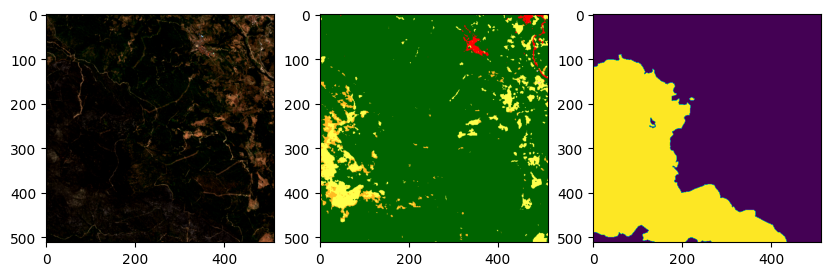

IndexedBounds(index=321, coords=(192, 67, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


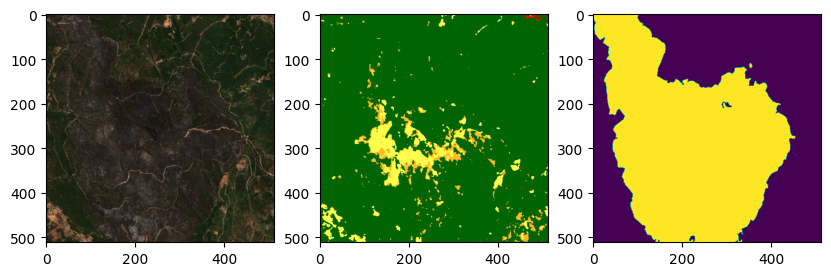

IndexedBounds(index=321, coords=(300, 62, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


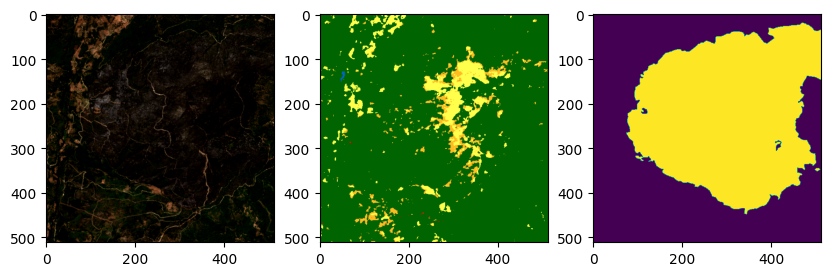

IndexedBounds(index=321, coords=(96, 48, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


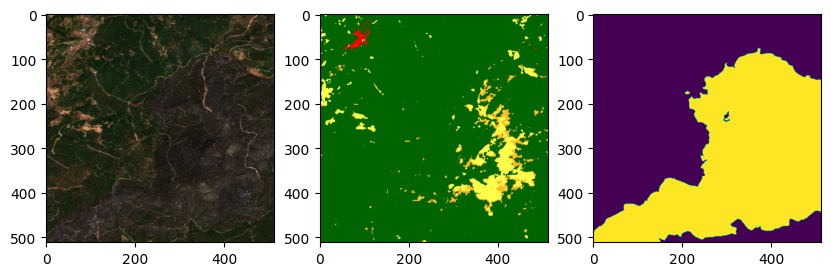

IndexedBounds(index=321, coords=(306, 139, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


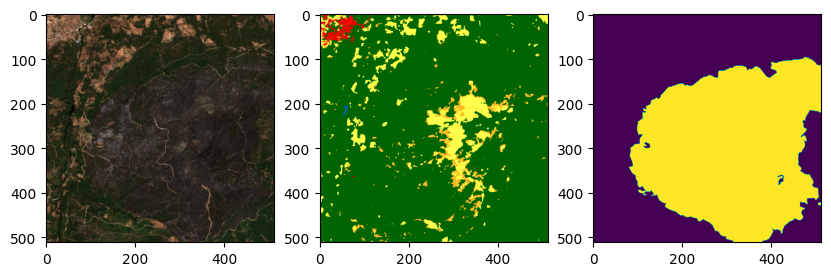

IndexedBounds(index=321, coords=(294, 160, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


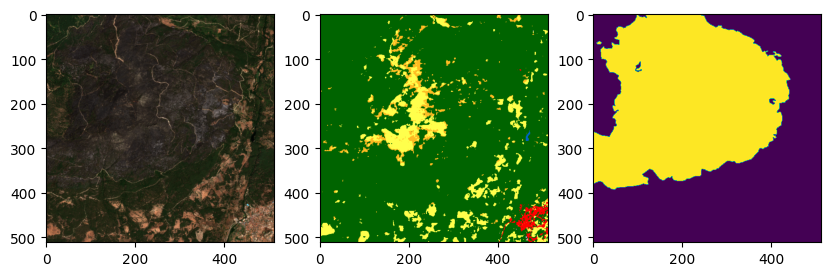

IndexedBounds(index=321, coords=(63, 52, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


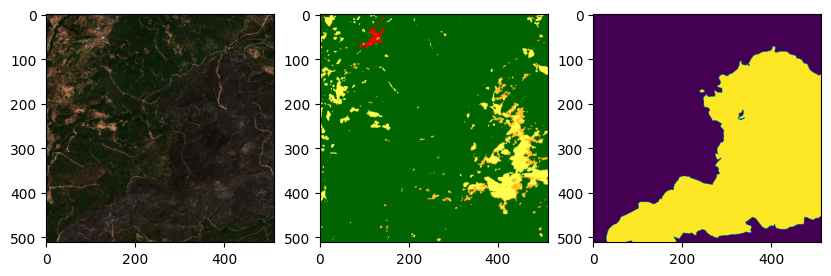

IndexedBounds(index=321, coords=(87, 65, 512, 512))
dict_keys(['CM', 'ESA_LC', 'S2L2A', 'DEL', 'metadata'])


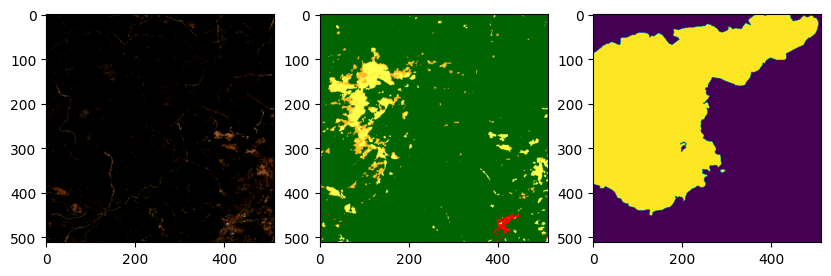

In [11]:
sampler = RandomTiledBatchSampler(dataset=crop_dataset, tile_size=512, batch_size=8)
batch = next(iter(sampler))
for bounds in batch:
    print( bounds)
    sample = crop_dataset[bounds]
    print(sample.keys())
    s2 = sample["S2L2A"][[3,2,1]].numpy()
    lc = sample["ESA_LC"].numpy().astype(np.uint8)
    msk = sample["DEL"].numpy().astype(np.uint8)
    s2 = np.moveaxis(s2, 0, -1) * 3
    s2 = np.clip(s2, 0, 1)
    lc = mask2rgb(lc, palette=crop_dataset.palette)
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(s2)
    ax[1].imshow(lc)
    ax[2].imshow(msk)
    plt.show()